# Gradient Descent: Understanding and Visualizing the Optimization Process

## Introduction
Gradient Descent is an optimization algorithm commonly used in machine learning to minimize functions, typically the loss function in neural networks. This practical lesson will cover:
- What gradient descent is and why it’s useful
- Mathematical intuition behind gradients and their role in optimization
- Step-by-step breakdown of gradient descent
- Visualizing gradient descent with different functions

---

## 1. What is Gradient Descent?

Gradient Descent is an iterative optimization algorithm used to minimize a function by moving towards the steepest descent direction, indicated by the negative of the gradient.

### Why Gradient Descent?
In machine learning, we use gradient descent to minimize our loss function (which measures prediction error). Minimizing this error helps our model make better predictions.

In simple terms, the gradient descent algorithm:
1. Computes the gradient (slope) of the loss function.
2. Updates the parameters by moving in the direction that reduces the loss.
3. Repeats until convergence (when the slope is close to zero).

---

## 2. Mathematical Intuition: Gradients and Derivatives

In mathematical terms, a **gradient** is a vector of partial derivatives. For a function \( f(x) \), the derivative \( f'(x) \) represents the slope at point \( x \). The slope tells us the direction of steepest increase of \( f(x) \).

### Example: Derivative of a Simple Function

Consider the function:

$f(x) = x^2$
The derivative of \( f(x) \) is:
$f'(x) = 2x$

This derivative tells us the slope at any point \( x \). Gradient descent will move us in the opposite direction of this slope (i.e., towards the minimum).

---

## 3. Implementing Gradient Descent on a Simple Function

Let's begin with gradient descent on a simple function, \( f(x) = x^2 \), and visualize the optimization process.

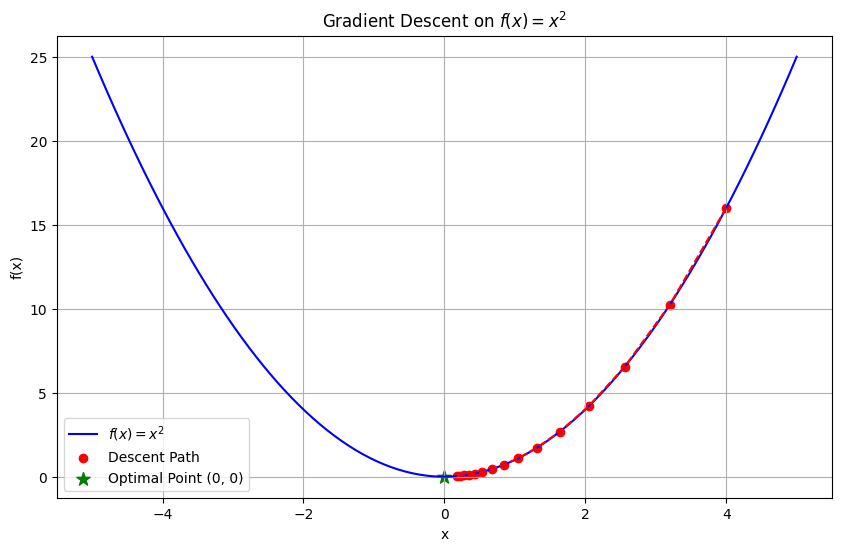

In [3]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x) = x^2
def f(x):
    return x**2

# Define the derivative f'(x) = 2x
def gradient(x):
    return 2 * x

# Gradient Descent Parameters
learning_rate = 0.1  # step size
x = 5  # starting point
iterations = 15
history = []  # to store the points visited

# Gradient Descent Loop
for i in range(iterations):
    grad = gradient(x)
    x = x - learning_rate * grad  # update step
    history.append((x, f(x)))  # record each step

# Visualization of the Descent Path
x_vals = np.linspace(-5, 5, 100)
y_vals = f(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label=r'$f(x) = x^2$', color="blue")
plt.scatter([point[0] for point in history], [point[1] for point in history], color="red", label="Descent Path")
plt.plot([point[0] for point in history], [point[1] for point in history], '--', color="red")
plt.scatter(0, f(0), color="green", s=100, marker='*', label="Optimal Point (0, 0)")  # Optimal point marker
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient Descent on $f(x) = x^2$")
plt.legend()
plt.grid(True)
plt.show()


### Observations
1. **Starting Point**: We start from \( x = 5 \), a point far from the minimum (0).
2. **Descent Path**: At each iteration, we move towards the minimum by adjusting \( x \) using the gradient's direction.
3. **Learning Rate**: The `learning_rate` controls how big each step is. If it’s too large, we might "overshoot" the minimum; if too small, it might take too long to converge.

---

## 4. Gradient Descent in Two Dimensions

To better understand the gradient descent path, let’s apply it to a two-dimensional function:

$f(x, y) = x^2 + y^2$

The gradient for this function is:

$\nabla f(x, y) = [2x, 2y]$

This function has a minimum at \( (0, 0) \).

Let's visualize the contour plot and see the descent path on this 3D surface.


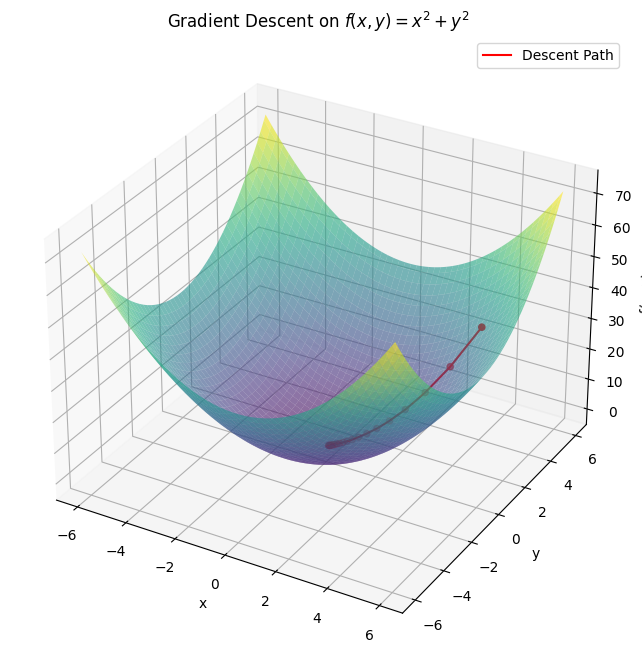

In [4]:
from mpl_toolkits.mplot3d import Axes3D

# Define the function f(x, y) = x^2 + y^2
def f_2d(x, y):
    return x**2 + y**2

# Define the gradient of f(x, y) = x^2 + y^2
def gradient_2d(x, y):
    return np.array([2 * x, 2 * y])

# Gradient Descent Parameters
learning_rate = 0.1
x, y = 5, 5  # starting point
iterations = 20
history_2d = []

# Gradient Descent Loop
for i in range(iterations):
    grad = gradient_2d(x, y)
    x = x - learning_rate * grad[0]
    y = y - learning_rate * grad[1]
    history_2d.append((x, y, f_2d(x, y)))

# Plotting the 3D Surface
x_vals = np.linspace(-6, 6, 100)
y_vals = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f_2d(X, Y)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap="viridis", alpha=0.6)
ax.scatter([p[0] for p in history_2d], [p[1] for p in history_2d], [p[2] for p in history_2d], color="red")
ax.plot([p[0] for p in history_2d], [p[1] for p in history_2d], [p[2] for p in history_2d], color="red", label="Descent Path")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.set_title("Gradient Descent on $f(x, y) = x^2 + y^2$")
plt.legend()
plt.show()


### Observations
1. **3D Path to the Minimum**: The red path shows how gradient descent moves in 3D space from the initial point towards the minimum.
2. **Contours and Descent**: This visualization shows how gradient descent seeks the lowest point on the surface, approaching the minimum iteratively.

---

## 5. Advanced Concept: Gradient Descent with a Complex Function

Now let's try a more complex function:

$f(x) = x^4 - 3x^3 + 2$

This function has a more complicated shape with multiple local minima, making it challenging for gradient descent to find the global minimum.

---

### Plotting and Running Gradient Descent on the Complex Function


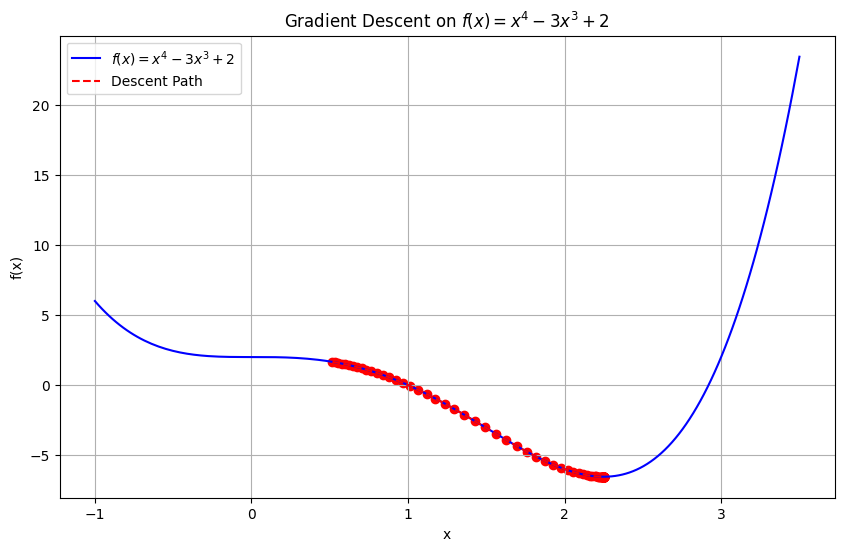

In [11]:
# Define a more complex function f(x) = x^4 - 3x^3 + 2
def f_complex(x):
    return x**4 - 3 * x**3 + 2

# Define its gradient
def gradient_complex(x):
    return 4 * x**3 - 9 * x**2

# Gradient Descent Parameters
learning_rate = 0.01
x = 0.5  # starting point close to a local minimum
iterations = 100
history_complex = []

# Gradient Descent Loop
for i in range(iterations):
    grad = gradient_complex(x)
    x = x - learning_rate * grad
    history_complex.append((x, f_complex(x)))

# Visualization of Gradient Descent Path
x_vals = np.linspace(-1, 3.5, 200)
y_vals = f_complex(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label=r'$f(x) = x^4 - 3x^3 + 2$', color="blue")
plt.scatter([p[0] for p in history_complex], [p[1] for p in history_complex], color="red")
plt.plot([p[0] for p in history_complex], [p[1] for p in history_complex], '--', color="red", label="Descent Path")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient Descent on $f(x) = x^4 - 3x^3 + 2$")
plt.legend()
plt.grid(True)
plt.show()


### Observations
1. **Local Minima Challenge**: The function has multiple local minima, demonstrating a potential challenge for gradient descent, which might get "stuck" in one of them.
2. **Global Minimum**: Starting near a local minimum illustrates how gradient descent is sensitive to the starting point in non-convex functions.

---

## Summary
- Gradient descent minimizes functions by iteratively adjusting parameters in the opposite direction of the gradient.
- For simple functions, gradient descent finds the global minimum.
- For complex functions, it can get trapped in local minima.
  
Understanding how learning rate, initial points, and function shape influence gradient descent is key to optimizing model performance.
